In [172]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from datetime import datetime
import os

In [173]:
with open("../data/user_to_channel.json", 'rb') as f:
    user_to_channel = pickle.load(f)
with open("../data/channel_to_user.json", 'rb') as f:
    channel_to_user = pickle.load(f)
with open("../data/to_rating.json", 'rb') as f:
    to_rating = pickle.load(f)
with open("../data/to_rating_test.json", 'rb') as f:
    to_rating_test = pickle.load(f)
with open("../data/to_rating_val.json", 'rb') as f:
    to_rating_val = pickle.load(f)

In [174]:
N = np.max(list(channel_to_user.keys())) + 1
m1 = np.max(list(channel_to_user.keys()))
m2 = np.max([m for (u, m), r in to_rating_test.items()])
M = max(m1, m2) + 1
print(N, M)


10000 10000


In [175]:
len(U)

10000

In [182]:
K = 100
W = np.random.randn(10000, K)
b = np.zeros(10000)
U = np.random.randn(10000, K)
c = np.zeros(10000)
mu = np.mean(list(to_rating.values()))

In [177]:
to_rating[(9999,4858)]

[-0.0757134483522995]

In [178]:
def get_loss(d):
    N = float(len(d))
    Error = 0
    for k, r in d.items():
        i, j = k
        p = W[i].dot(U[j]) + b[i] + c[j] + mu
        Error += (p-r)*(p-r)
    return Error/N

In [ ]:
train_vs_reg = []
val_vs_reg = []
test_vs_reg = []
for i in np.arange(0, 1, 0.1):
    epochs = 100
    reg = i
    train_losses = []
    val_losses = []
    train_losses.append(get_loss(to_rating))
    val_losses.append(get_loss(to_rating_val))
    stop = 0
    for epoch in range(epochs):
        print("epoch:", epoch)
        epoch_start = datetime.now()
        
        t0 = datetime.now()
        for i in user_to_channel.keys():
            matrix = np.eye(K) * reg
            vector = np.zeros(K)
            
            bi = 0
            for j in user_to_channel[i]:
                r = to_rating[(i, j)]
                matrix += np.outer(U[j], U[j])
                vector += (r - b[i] - c[i] - mu) * U[j]
                bi += (r - W[i].dot(U[j]) - c[j] - mu)
            
            W[i] = np.linalg.solve(matrix, vector)
            b[i] = bi / (len(user_to_channel[i]) + reg)
        
        for j in channel_to_user.keys():
            matrix = np.eye(K) * reg
            vector = np.zeros(K)
            
            cj = 0
            try:
                for i in channel_to_user[j]:
                    r = to_rating[(i, j)]
                    matrix += np.outer(W[i], W[i])
                    vector += (r - b[i] - c[j] - mu) * W[i]
                    cj += (r - W[i].dot(U[j]) - b[i] - mu)
                
                U[j] = np.linalg.solve(matrix, vector)
                c[j] = cj / (len(channel_to_user[j]) + reg)
                
            except KeyError:
                pass
        
        train_losses.append(get_loss(to_rating))
        val_losses.append(get_loss(to_rating_val))
        print("time spent:", datetime.now() - t0)
        print("train loss:", train_losses[-1])
        print("validation loss:", val_losses[-1])
        if val_losses[-1] > val_losses[-2]:
            stop += 1
        else:
            stop = 0
        if stop == 2:
            break
    train_vs_reg.append(train_losses)
    val_vs_reg.append(val_losses)
    K = 100
    W = np.random.randn(10000, K)
    b = np.zeros(10000)
    U = np.random.randn(10000, K)
    c = np.zeros(10000)
    mu = np.mean(list(to_rating.values()))

In [ ]:
for i in np.arange(10, 110, 10):
    K = i
    W = np.random.randn(10000, K)
    b = np.zeros(10000)
    U = np.random.randn(10000, K)
    c = np.zeros(10000)
    mu = np.mean(list(to_rating.values()))
    epochs = 100
    reg = 0.7
    train_losses = []
    val_losses = []
    train_losses.append(get_loss(to_rating))
    val_losses.append(get_loss(to_rating_val))
    stop = 0
    for epoch in range(epochs):
        print("epoch:", epoch)
        epoch_start = datetime.now()
        
        t0 = datetime.now()
        for i in user_to_channel.keys():
            matrix = np.eye(K) * reg
            vector = np.zeros(K)
            
            bi = 0
            for j in user_to_channel[i]:
                r = to_rating[(i, j)]
                matrix += np.outer(U[j], U[j])
                vector += (r - b[i] - c[i] - mu) * U[j]
                bi += (r - W[i].dot(U[j]) - c[j] - mu)
            
            W[i] = np.linalg.solve(matrix, vector)
            b[i] = bi / (len(user_to_channel[i]) + reg)
        
        for j in channel_to_user.keys():
            matrix = np.eye(K) * reg
            vector = np.zeros(K)
            
            cj = 0
            try:
                for i in channel_to_user[j]:
                    r = to_rating[(i, j)]
                    matrix += np.outer(W[i], W[i])
                    vector += (r - b[i] - c[j] - mu) * W[i]
                    cj += (r - W[i].dot(U[j]) - b[i] - mu)
                
                U[j] = np.linalg.solve(matrix, vector)
                c[j] = cj / (len(channel_to_user[j]) + reg)
                
            except KeyError:
                pass

        train_losses.append(get_loss(to_rating))
        val_losses.append(get_loss(to_rating_val))
        print("time spent:", datetime.now() - t0)
        print("train loss:", train_losses[-1])
        print("validation loss:", val_losses[-1])
        if val_losses[-1] > val_losses[-2]:
            stop += 1
        else:
            stop = 0
        if stop == 2:
            break
    train_vs_reg.append(train_losses)
    val_vs_reg.append(val_losses)

epoch: 0
time spent: 0:00:03.729487
train loss: [1.26863764]
validation loss: [10.62297138]
epoch: 1
time spent: 0:00:03.117549
train loss: [0.66544398]
validation loss: [8.58046345]
epoch: 2
time spent: 0:00:03.071031
train loss: [0.20574569]
validation loss: [7.84780113]
epoch: 3
time spent: 0:00:03.008658
train loss: [0.14520752]
validation loss: [7.71187226]
epoch: 4
time spent: 0:00:03.241496
train loss: [0.07063855]
validation loss: [7.75155806]
epoch: 5
time spent: 0:00:03.117304
train loss: [0.06197324]
validation loss: [7.74937761]
epoch: 6
time spent: 0:00:03.019373
train loss: [0.04446619]
validation loss: [7.77406167]
epoch: 7
time spent: 0:00:03.053991
train loss: [0.04459278]
validation loss: [7.83145719]
epoch: 0
time spent: 0:00:03.430396
train loss: [2.08271367]
validation loss: [12.23983017]
epoch: 1
time spent: 0:00:03.194816
train loss: [0.94618603]
validation loss: [8.85966046]
epoch: 2
time spent: 0:00:03.245664
train loss: [0.25850289]
validation loss: [7.8053915

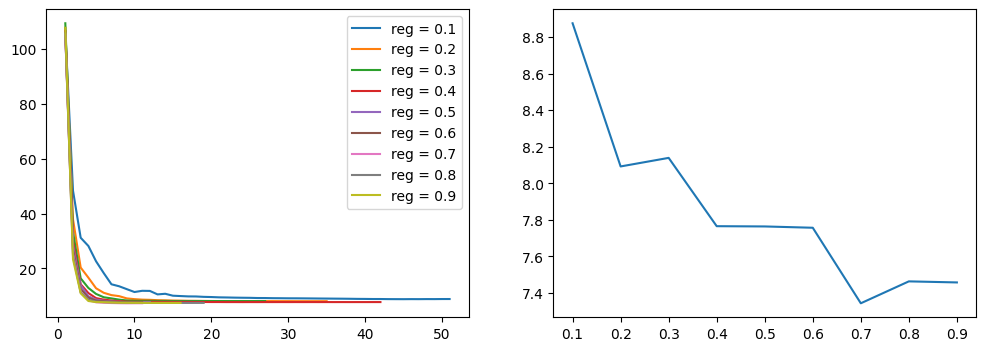

In [ ]:
losses = [i[-1] for i in val_vs_reg[0:10]]
plt.rcParams['figure.figsize'] = [12,4]
plt.subplot(1, 2, 1)
plt.plot(range(1, len(val_vs_reg[1])+1), val_vs_reg[1], label='reg = 0.1')
plt.plot(range(1, len(val_vs_reg[2])+1), val_vs_reg[2], label='reg = 0.2')
plt.plot(range(1, len(val_vs_reg[3])+1), val_vs_reg[3], label='reg = 0.3')
plt.plot(range(1, len(val_vs_reg[4])+1), val_vs_reg[4], label='reg = 0.4')
plt.plot(range(1, len(val_vs_reg[5])+1), val_vs_reg[5], label='reg = 0.5')
plt.plot(range(1, len(val_vs_reg[6])+1), val_vs_reg[6], label='reg = 0.6')
plt.plot(range(1, len(val_vs_reg[7])+1), val_vs_reg[7], label='reg = 0.7')
plt.plot(range(1, len(val_vs_reg[8])+1), val_vs_reg[8], label='reg = 0.8')
plt.plot(range(1, len(val_vs_reg[9])+1), val_vs_reg[9], label='reg = 0.9')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(np.arange(0.1, 1, 0.1), losses[1:10])

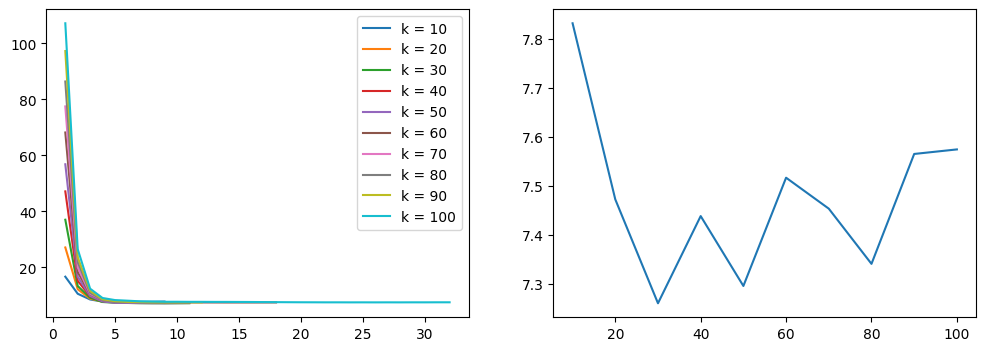

In [ ]:
losses = [i[-1] for i in val_vs_reg[10:20]]
plt.rcParams['figure.figsize'] = [12,4]
plt.subplot(1, 2, 1)
plt.plot(range(1, len(val_vs_reg[10])+1), val_vs_reg[10], label='k = 10')
plt.plot(range(1, len(val_vs_reg[11])+1), val_vs_reg[11], label='k = 20')
plt.plot(range(1, len(val_vs_reg[12])+1), val_vs_reg[12], label='k = 30')
plt.plot(range(1, len(val_vs_reg[13])+1), val_vs_reg[13], label='k = 40')
plt.plot(range(1, len(val_vs_reg[14])+1), val_vs_reg[14], label='k = 50')
plt.plot(range(1, len(val_vs_reg[15])+1), val_vs_reg[15], label='k = 60')
plt.plot(range(1, len(val_vs_reg[16])+1), val_vs_reg[16], label='k = 70')
plt.plot(range(1, len(val_vs_reg[17])+1), val_vs_reg[17], label='k = 80')
plt.plot(range(1, len(val_vs_reg[18])+1), val_vs_reg[18], label='k = 90')
plt.plot(range(1, len(val_vs_reg[19])+1), val_vs_reg[19], label='k = 100')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(np.arange(10, 110, 10), losses)

In [ ]:
losses =[]
losses = [i[-1] for i in val_vs_reg]
losses

31

In [183]:
K = 30
W = np.random.randn(10000, K)
b = np.zeros(10000)
U = np.random.randn(10000, K)
c = np.zeros(10000)
mu = np.mean(list(to_rating.values()))
epochs = 100
reg = 0.7
train_losses = []
val_losses = []
train_losses.append(get_loss(to_rating))
val_losses.append(get_loss(to_rating_val))
stop = 0
for epoch in range(epochs):
    print("epoch:", epoch)
    epoch_start = datetime.now()
    
    t0 = datetime.now()
    for i in user_to_channel.keys():
        matrix = np.eye(K) * reg
        vector = np.zeros(K)
        
        bi = 0
        for j in user_to_channel[i]:
            r = to_rating[(i, j)]
            matrix += np.outer(U[j], U[j])
            vector += (r - b[i] - c[i] - mu) * U[j]
            bi += (r - W[i].dot(U[j]) - c[j] - mu)
        
        W[i] = np.linalg.solve(matrix, vector)
        b[i] = bi / (len(user_to_channel[i]) + reg)
    
    for j in channel_to_user.keys():
        matrix = np.eye(K) * reg
        vector = np.zeros(K)
        
        cj = 0
        try:
            for i in channel_to_user[j]:
                r = to_rating[(i, j)]
                matrix += np.outer(W[i], W[i])
                vector += (r - b[i] - c[j] - mu) * W[i]
                cj += (r - W[i].dot(U[j]) - b[i] - mu)
            
            U[j] = np.linalg.solve(matrix, vector)
            c[j] = cj / (len(channel_to_user[j]) + reg)
            
        except KeyError:
            pass
    
    train_losses.append(get_loss(to_rating))
    val_losses.append(get_loss(to_rating_val))
    print("time spent:", datetime.now() - t0)
    print("train loss:", train_losses[-1])
    print("validation loss:", val_losses[-1])
    print(get_loss(to_rating_test))
    if val_losses[-1] > val_losses[-2]:
        stop += 1
    else:
        stop = 0
    if stop == 2:
        break

epoch: 0
time spent: 0:00:00.538918
train loss: [3.07125016]
validation loss: [8.72782894]
[9.11426451]
epoch: 1
time spent: 0:00:00.668599
train loss: [0.97333315]
validation loss: [4.91390763]
[5.20002875]
epoch: 2
time spent: 0:00:00.841057
train loss: [0.1533651]
validation loss: [3.95736914]
[3.99199842]
epoch: 3
time spent: 0:00:00.538383
train loss: [0.07070061]
validation loss: [3.64937135]
[3.67719333]
epoch: 4
time spent: 0:00:00.543853
train loss: [0.03560325]
validation loss: [3.62596105]
[3.63637118]
epoch: 5
time spent: 0:00:00.542802
train loss: [0.02983253]
validation loss: [3.56983511]
[3.58131756]
epoch: 6
time spent: 0:00:00.607465
train loss: [0.02262575]
validation loss: [3.56633385]
[3.56443914]
epoch: 7
time spent: 0:00:00.634053
train loss: [0.0216321]
validation loss: [3.54843228]
[3.53882377]
epoch: 8
time spent: 0:00:00.539849
train loss: [0.01903828]
validation loss: [3.54860155]
[3.53411677]
epoch: 9
time spent: 0:00:00.534201
train loss: [0.01856991]
valid

In [184]:
get_loss(to_rating_test)

array([3.52126467])